<a href="https://colab.research.google.com/github/kelvinmaina01/Inua360-The-Kenyan-SME-AI-Agent/blob/ml/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\data\raw\african_sme_digital_transformation.csv")

In [25]:
df.head()

,company_id,country,sector,employees,annual_revenue,tech_adoption_level,main_challenges,digital_tools_used,growth_last_yr,funding_status,female_owned,remote_work_policy
0,1,Ghana,Education,130,386441,Low,Awareness,"CRM, WhatsApp, E-commerce",11,Seed,No,NaN
1,2,Rwanda,Farming,367,383576,Low,Internet,WhatsApp,27,Series A,Yes,Partial
2,3,Kenya,Farming,87,496528,Low,"Awareness, Internet","Google My Business, Mobile money, POS",1,Bootstrapped,No,Full
3,4,Kenya,Manufacturing,131,360550,High,Regulation,"Google My Business, E-commerce, POS",6,NaN,Yes,Full
4,5,Nigeria,Logistics,136,173801,High,"Regulation, Skills",E-commerce,44,Series A,Yes,Partial


In [26]:
df.shape

(1000, 12)

In [27]:
df.isnull().sum()

company_id               0
country                  0
sector                   0
employees                0
annual_revenue           0
tech_adoption_level      0
main_challenges          0
digital_tools_used       0
growth_last_yr           0
funding_status         254
female_owned             0
remote_work_policy     323
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   company_id           1000 non-null   int64 
 1   country              1000 non-null   object
 2   sector               1000 non-null   object
 3   employees            1000 non-null   int64 
 4   annual_revenue       1000 non-null   int64 
 5   tech_adoption_level  1000 non-null   object
 6   main_challenges      1000 non-null   object
 7   digital_tools_used   1000 non-null   object
 8   growth_last_yr       1000 non-null   int64 
 9   funding_status       746 non-null    object
 10  female_owned         1000 non-null   object
 11  remote_work_policy   677 non-null    object
dtypes: int64(4), object(8)
memory usage: 93.9+ KB


In [29]:
df.describe()


,company_id,employees,annual_revenue,growth_last_yr
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,257.416000,246821.473000,22.463000
std,288.819436,144.479775,137875.506025,16.268968
min,1.000000,5.000000,10161.000000,-5.000000
25%,250.750000,130.750000,131194.000000,9.000000
50%,500.500000,261.000000,247017.000000,22.000000
75%,750.250000,387.250000,355288.750000,37.000000
max,1000.000000,499.000000,499366.000000,50.000000


In [30]:
df['country'].value_counts()


country
Ghana           218
Nigeria         214
Kenya           208
Rwanda          188
South Africa    172
Name: count, dtype: int64

In [31]:
df.groupby('country')['annual_revenue'].mean()

country
Ghana           238852.357798
Kenya           237983.514423
Nigeria         244944.191589
Rwanda          260418.851064
South Africa    255083.063953
Name: annual_revenue, dtype: float64

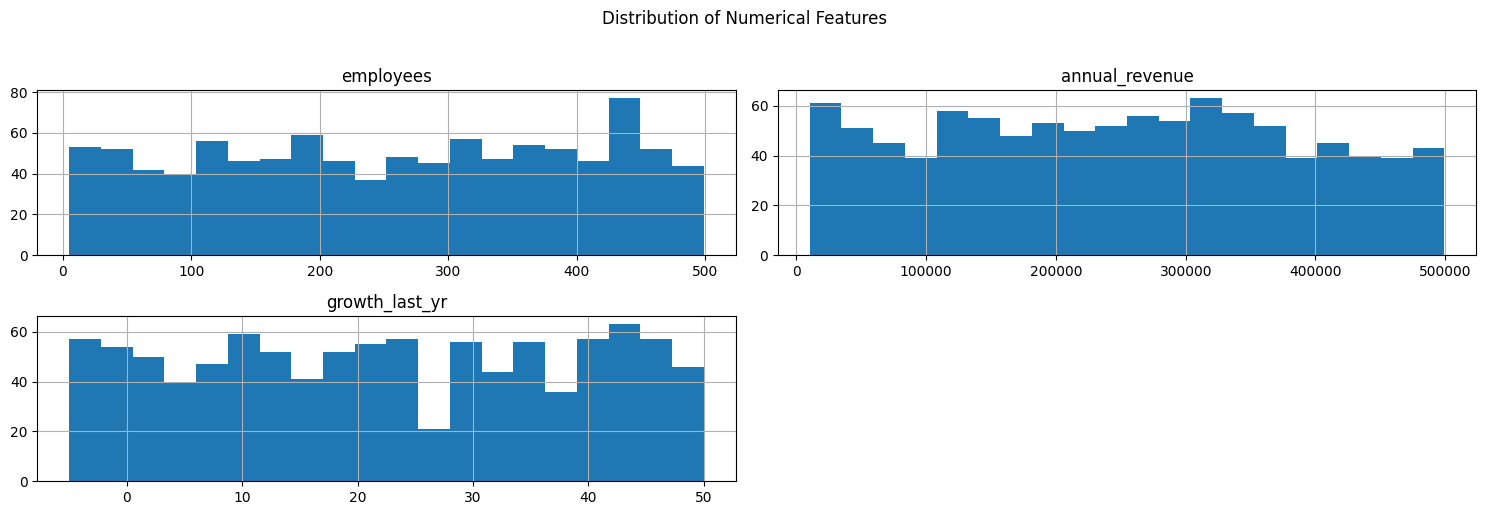

Figure saved at: C:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\numerical_distribution.png


In [32]:
numerical_cols = ['employees', 'annual_revenue', 'growth_last_yr']

from pathlib import Path
import matplotlib.pyplot as plt

REPORTS_DIR = Path(r"C:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures")
REPORTS_DIR.mkdir(parents=True, exist_ok=True)  # ensures folder exists

save_path = REPORTS_DIR / "numerical_distribution.png"

df[numerical_cols].hist(bins=20, figsize=(15, 5))
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Figure saved at: {save_path}")


In [33]:
import matplotlib.pyplot as plt
from pathlib import Path

categorical_cols = ['country', 'sector', 'tech_adoption_level']

REPORTS_DIR = Path(r"C:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures")
REPORTS_DIR.mkdir(parents=True, exist_ok=True)

for col in categorical_cols:
    plt.figure(figsize=(6, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
     
    save_path = REPORTS_DIR / f"{col}_distribution.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()  
    
    print(f"Saved: {save_path}")


Saved: C:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\country_distribution.png
Saved: C:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\sector_distribution.png
Saved: C:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\tech_adoption_level_distribution.png


In [34]:
print(df['funding_status'].value_counts(dropna=False))
print(df['remote_work_policy'].value_counts(dropna=False))

funding_status
Series A        259
NaN             254
Seed            252
Bootstrapped    235
Name: count, dtype: int64
remote_work_policy
Full       351
Partial    326
NaN        323
Name: count, dtype: int64


In [35]:
df['funding_status'] = df['funding_status'].fillna('Unknown')
df['remote_work_policy'] = df['remote_work_policy'].fillna('No Policy')
print(df.isnull().sum())

company_id             0
country                0
sector                 0
employees              0
annual_revenue         0
tech_adoption_level    0
main_challenges        0
digital_tools_used     0
growth_last_yr         0
funding_status         0
female_owned           0
remote_work_policy     0
dtype: int64


In [36]:
country_revenue_growth = df.groupby('country')[['annual_revenue', 'growth_last_yr']].mean()
print("Mean annual revenue and growth by country:")
display(country_revenue_growth)

sector_revenue_growth = df.groupby('sector')[['annual_revenue', 'growth_last_yr']].mean()
print("\nMean annual revenue and growth by sector:")
display(sector_revenue_growth)

tech_adoption_revenue_growth = df.groupby('tech_adoption_level')[['annual_revenue', 'growth_last_yr']].mean()
print("\nMean annual revenue and growth by tech adoption level:")
display(tech_adoption_revenue_growth)

correlation_matrix = df[['employees', 'annual_revenue', 'growth_last_yr']].corr()
print("\nCorrelation matrix for numerical columns:")
display(correlation_matrix)

Mean annual revenue and growth by country:


,annual_revenue,growth_last_yr
country,,
Ghana,238852.357798,22.362385
Kenya,237983.514423,22.153846
Nigeria,244944.191589,21.429907
Rwanda,260418.851064,22.489362
South Africa,255083.063953,24.220930



Mean annual revenue and growth by sector:


,annual_revenue,growth_last_yr
sector,,
Education,235799.930233,22.122093
Farming,256430.875776,20.583851
Finance,237618.711538,24.698718
Logistics,245826.901734,22.456647
Manufacturing,254543.060606,20.478788
Retail,250764.947977,24.433526



Mean annual revenue and growth by tech adoption level:


,annual_revenue,growth_last_yr
tech_adoption_level,,
High,248812.087977,23.249267
Low,245291.025000,22.384375
Medium,246263.784661,21.746313



Correlation matrix for numerical columns:


,employees,annual_revenue,growth_last_yr
employees,1.000000,-0.043978,0.013428
annual_revenue,-0.043978,1.000000,-0.048764
growth_last_yr,0.013428,-0.048764,1.000000


In [37]:
tech_country_analysis = df.groupby(['tech_adoption_level', 'country'])[['annual_revenue', 'growth_last_yr']].mean()
funding_growth = df.groupby('funding_status')['growth_last_yr'].mean().reset_index()
remote_work_growth = df.groupby('remote_work_policy')['growth_last_yr'].mean().reset_index()

print("Analysis by Tech Adoption Level and Country:")
display(tech_country_analysis)

print("\nAnalysis of Growth by Funding Status:")
display(funding_growth)

print("\nAnalysis of Growth by Remote Work Policy:")
display(remote_work_growth)

Analysis by Tech Adoption Level and Country:


annual_revenue  growth_last_yr
tech_adoption_level country                                     
High                Ghana          238663.493827       23.259259
                    Kenya          221416.462687       23.910448
                    Nigeria        259314.088235       20.147059
                    Rwanda         279098.307692       24.123077
                    South Africa   248392.133333       25.066667
Low                 Ghana          242488.279412       21.720588
                    Kenya          247000.041096       20.849315
                    Nigeria        230750.038961       22.662338
                    Rwanda         262381.120000       25.420000
                    South Africa   251656.019231       22.076923
Medium              Ghana          235490.840580       21.942029
                    Kenya          244627.426471       21.823529
                    Nigeria        246622.405797       21.318841
                    Rwanda         242442.438356       19.027397
                    South Africa   264744.100000       25.233333


Analysis of Growth by Funding Status:


,funding_status,growth_last_yr
0,Bootstrapped,23.702128
1,Seed,21.785714
2,Series A,22.814672
3,Unknown,21.629921



Analysis of Growth by Remote Work Policy:


,remote_work_policy,growth_last_yr
0,Full,22.390313
1,No Policy,21.826625
2,Partial,23.171779


In [38]:
# mean annual revenue and growth by country
country_revenue_growth[['annual_revenue', 'growth_last_yr']].plot(kind='bar', figsize=(12, 6))
plt.title('Mean Annual Revenue and Growth by Country')
plt.xlabel('Country')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
save_path = REPORTS_DIR / f"Mean_Annual_Revenue_and_Growth_by_Country.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.close() 
plt.show() 
    
 

In [39]:
# mean annual revenue and growth by sector
sector_revenue_growth[['annual_revenue', 'growth_last_yr']].plot(kind='bar', figsize=(12, 6))
plt.title('Mean Annual Revenue and Growth by Sector')
plt.xlabel('Sector')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
save_path = REPORTS_DIR / f"Mean_annual_Revenue_and_Growth_by_Sector.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.close()  
    
plt.show()

In [40]:
# mean annual revenue and growth by tech adoption level
tech_adoption_revenue_growth[['annual_revenue', 'growth_last_yr']].plot(kind='bar', figsize=(10, 6))
plt.title('Mean Annual Revenue and Growth by Tech Adoption Level')
plt.xlabel('Tech Adoption Level')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.tight_layout()
save_path = REPORTS_DIR / f"Mean_Annual_Revenue_and_Growth_by_Tech_Adoption_Level.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.close()  
    
plt.show()

In [41]:
# correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.tight_layout()
save_path = REPORTS_DIR / f"Correlation_Matrix_of_Numerical_Columns.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.close()  
    
plt.show()

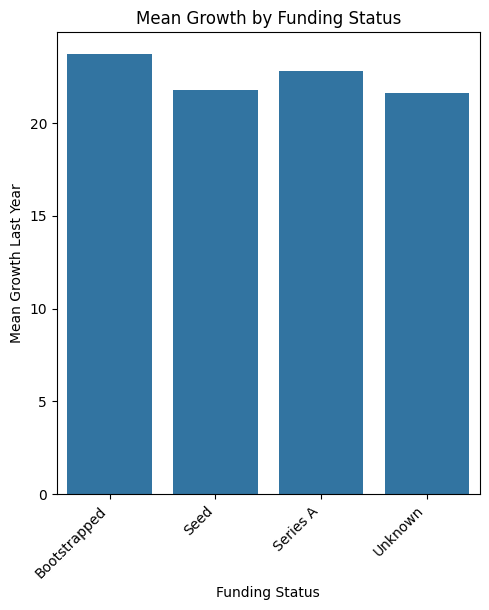

Saved: C:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\Mean_Growth_by_Funding_Status.png


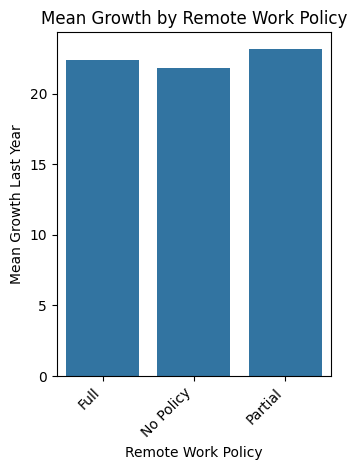

Saved: C:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\mean_growth_by_funding_and_remote_policy.png


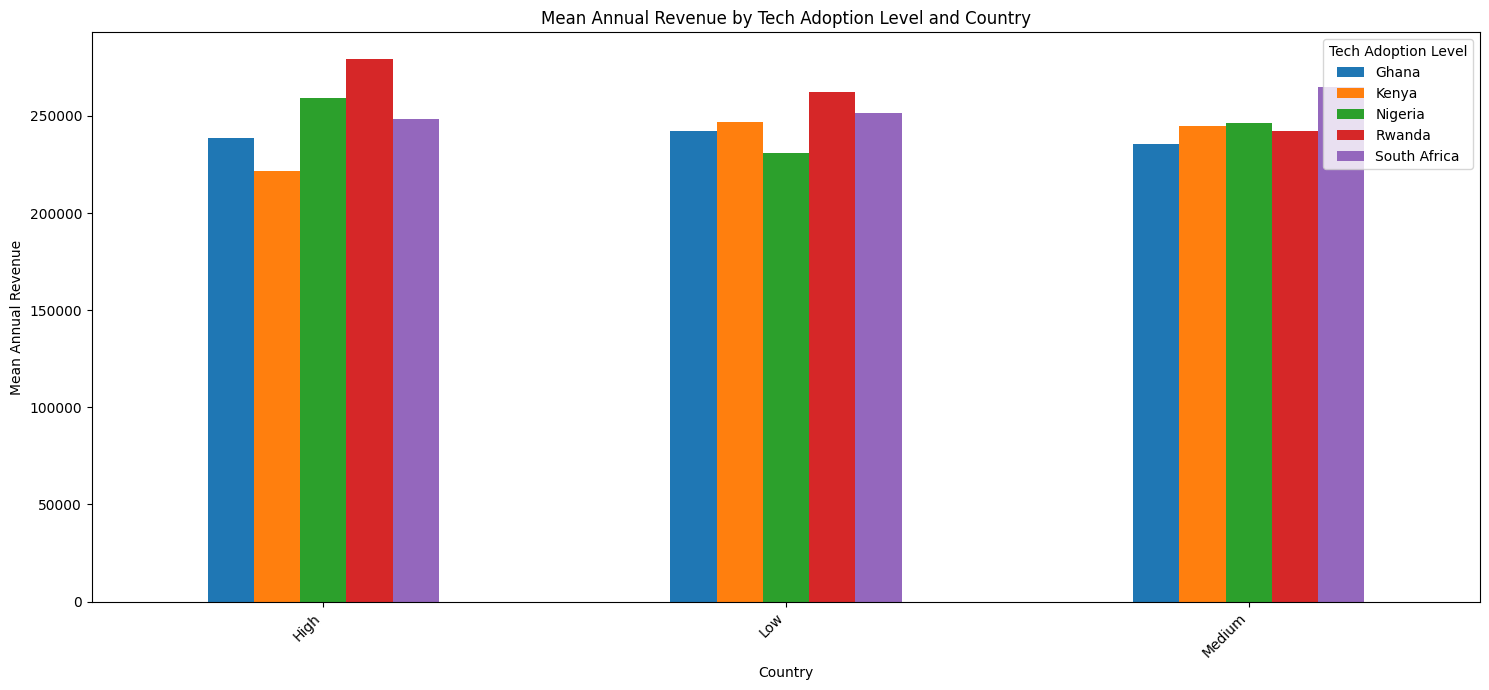

Saved: C:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\mean_annual_revenue_by_tech_adoption_and_country.png


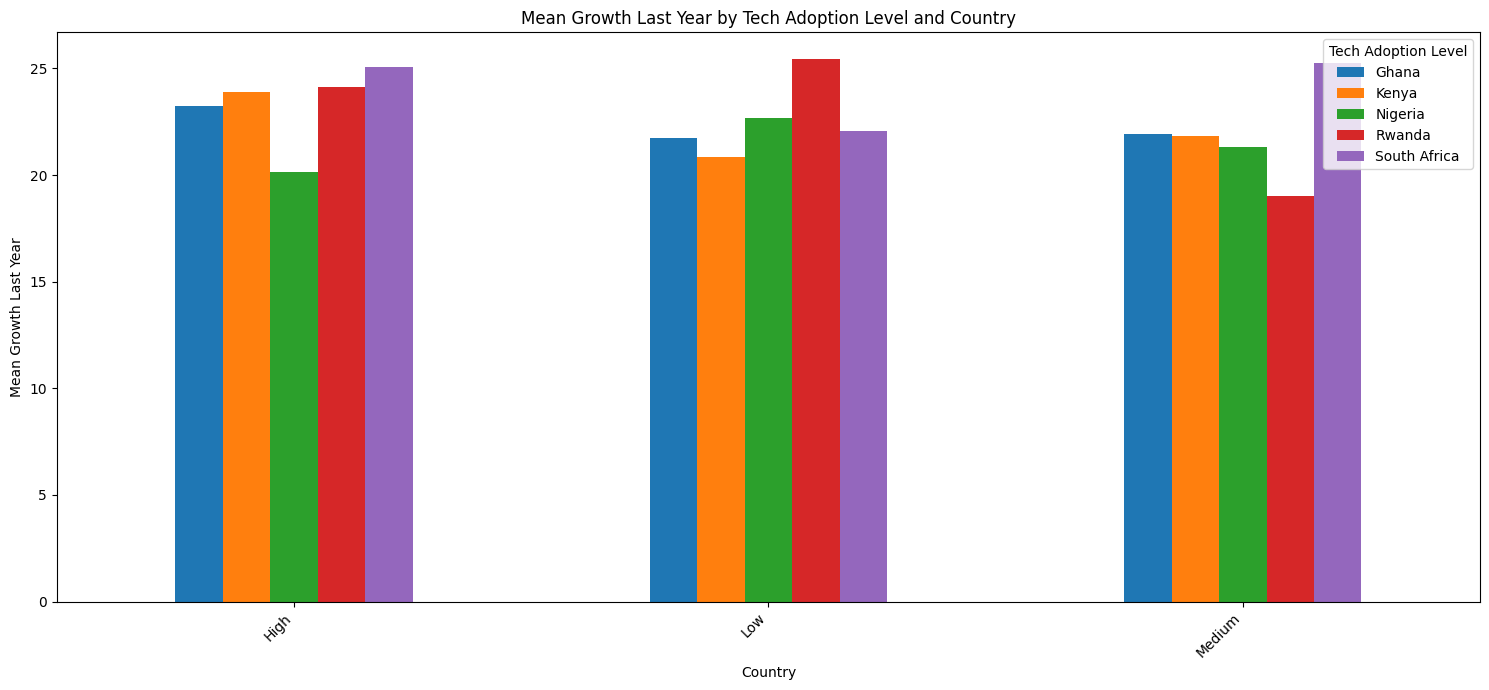

Saved: C:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\mean_growth_last_year_by_tech_adoption_and_country.png


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

REPORTS_DIR = Path(r"C:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures")
REPORTS_DIR.mkdir(parents=True, exist_ok=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='funding_status', y='growth_last_yr', data=funding_growth)
plt.title('Mean Growth by Funding Status')
plt.xlabel('Funding Status')
plt.ylabel('Mean Growth Last Year')
plt.xticks(rotation=45, ha='right')

save_path = REPORTS_DIR / "Mean_Growth_by_Funding_Status.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {save_path}")

plt.subplot(1, 2, 2)
sns.barplot(x='remote_work_policy', y='growth_last_yr', data=remote_work_growth)
plt.title('Mean Growth by Remote Work Policy')
plt.xlabel('Remote Work Policy')
plt.ylabel('Mean Growth Last Year')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

save_path = REPORTS_DIR / "mean_growth_by_funding_and_remote_policy.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {save_path}")

ax = tech_country_analysis['annual_revenue'].unstack().plot(kind='bar', figsize=(15, 7))
plt.title('Mean Annual Revenue by Tech Adoption Level and Country')
plt.xlabel('Country')
plt.ylabel('Mean Annual Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tech Adoption Level')
plt.tight_layout()
 
save_path = REPORTS_DIR / "mean_annual_revenue_by_tech_adoption_and_country.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {save_path}")

ax = tech_country_analysis['growth_last_yr'].unstack().plot(kind='bar', figsize=(15, 7))
plt.title('Mean Growth Last Year by Tech Adoption Level and Country')
plt.xlabel('Country')
plt.ylabel('Mean Growth Last Year')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tech Adoption Level')
plt.tight_layout()

 
save_path = REPORTS_DIR / "mean_growth_last_year_by_tech_adoption_and_country.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {save_path}")


In [43]:
df.isnull().sum()

company_id             0
country                0
sector                 0
employees              0
annual_revenue         0
tech_adoption_level    0
main_challenges        0
digital_tools_used     0
growth_last_yr         0
funding_status         0
female_owned           0
remote_work_policy     0
dtype: int64

In [44]:
from pathlib import Path

SAVE_PATH = Path(r"C:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\data\interim")
SAVE_PATH.mkdir(parents=True, exist_ok=True)

file_path = SAVE_PATH / "Clean_data.csv"
df.to_csv(file_path, index=False)

print(f"File saved at: {file_path}")


File saved at: C:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\data\interim\Clean_data.csv
